In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# Đường dẫn đến file CSV chứa thông tin nhãn và đường dẫn ảnh
csv_path = 'img_labels.csv'

In [4]:
# Đọc file CSV vào DataFrame
data = pd.read_csv(csv_path)
data_top=data.head()
data_top

,Label,Image_Path
0,-,D:\DoAn1\math\extracted_images\-\-_100005.jpg
1,-,D:\DoAn1\math\extracted_images\-\-_100007.jpg
2,-,D:\DoAn1\math\extracted_images\-\-_100009.jpg
3,-,D:\DoAn1\math\extracted_images\-\-_100015.jpg
4,-,D:\DoAn1\math\extracted_images\-\-_100021.jpg


In [5]:
image_folder = 'D:\DoAn1\math\extracted_images'

In [6]:
images = []
labels = []

In [7]:
# Đọc ảnh và chuẩn bị dữ liệu

for index, row in data.iterrows():
    image_path = os.path.join(image_folder, row['Image_Path'])
    label = row['Label']
    
    # Đọc ảnh và chuyển đổi thành định dạng phù hợp
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (28, 28))  # Điều chỉnh kích thước ảnh
    image = np.array(image) / 255.0  # Chuẩn hóa giá trị pixel về khoảng 0-1
    
    images.append(image)                                                                                                                                                                                                                                                                                        
    labels.append(label)


In [60]:
labels[97540]

'='

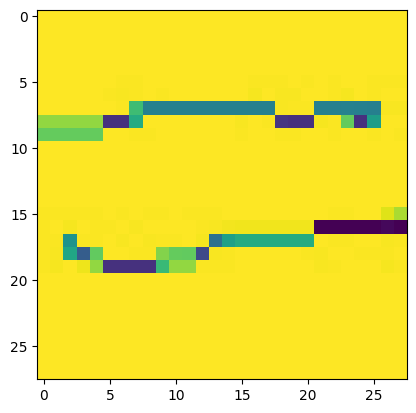

In [61]:
import matplotlib.pyplot as plt

plt.imshow(images[97540])

TRỘN DATA

In [10]:
len(images)

278185

In [57]:
labels[97540]


'='

In [12]:
import random

# Trộn dữ liệu

shuffle_order = list(range(278185))
random.shuffle(shuffle_order)

train_data = np.array(images)
train_label = np.array(labels)



train_data = train_data[shuffle_order]
train_label = train_label[shuffle_order]


# chuyển đữ liệu số:
label_encoder = LabelEncoder()
train_label = label_encoder.fit_transform(train_label)


# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.2, random_state=42)


In [58]:
original_labels = label_encoder.inverse_transform(train_label)
original_labels[97540]

'e'

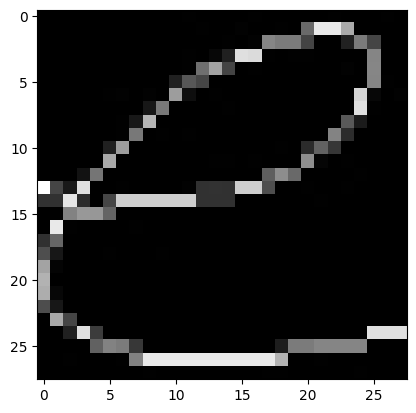

In [59]:
plt.imshow(train_data[97540],cmap=plt.cm.binary)

ĐƯA ẢNH VỀ TỈ LỆ ĐÚNG MÔ HÌNH

In [15]:
# Chuyển đổi dữ liệu thành định dạng phù hợp cho mô hình CNN
x_train = np.array(x_train).reshape(-1, 28, 28, 1)
x_test = np.array(x_test).reshape(-1, 28, 28, 1)


HUẤN LUYỆN MÔ HÌNH

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [17]:
#model = Sequential()

##model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 1)))
#model.add(Activation("relu"))
#model.add(BatchNormalization())
#model.add(Conv2D(32, (3,3), padding = "same"))
#model.add(Activation("relu"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size= (2,2)))

In [106]:
# Tạo mô hình CNN
model = Sequential()

# Layer 1: Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Layer 2: Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Layer 3: Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# Layer 4: Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

# Layer 7: Fully Connected Layer
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))

# Layer 8: Fully Connected Layer
model.add(Dense(units=34, activation='softmax'))

In [19]:
#model.add(Conv2D(64, (3,3)))
#model.add(Activation("relu"))
#model.add(BatchNormalization())
#model.add(Conv2D(64, (3,3)))
#model.add(Activation("relu"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size= (2,2)))

In [20]:
#model.add(Flatten())
#model.add(Dense(512))
#model.add(Activation("relu"))
#model.add(BatchNormalization())
#model.add(Dense(67))
#model.add(Activation("softmax"))

In [107]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 5, 5, 32)         

In [96]:
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"] )

In [97]:
model.fit(x_train,y_train, validation_data=(x_test,y_test) ,epochs=10, verbose=1)

Epoch 1/10
6955/6955 [==============================] - 85s 12ms/step - loss: 0.5302 - accuracy: 0.8440 - val_loss: 0.1906 - val_accuracy: 0.9397
Epoch 2/10
6955/6955 [==============================] - 85s 12ms/step - loss: 0.2618 - accuracy: 0.9186 - val_loss: 0.1397 - val_accuracy: 0.9529
Epoch 3/10
6955/6955 [==============================] - 85s 12ms/step - loss: 0.2161 - accuracy: 0.9301 - val_loss: 0.1201 - val_accuracy: 0.9593
Epoch 4/10
6955/6955 [==============================] - 86s 12ms/step - loss: 0.1959 - accuracy: 0.9361 - val_loss: 0.1100 - val_accuracy: 0.9616
Epoch 5/10
6955/6955 [==============================] - 86s 12ms/step - loss: 0.1845 - accuracy: 0.9396 - val_loss: 0.1056 - val_accuracy: 0.9651
Epoch 6/10
6955/6955 [==============================] - 86s 12ms/step - loss: 0.1734 - accuracy: 0.9435 - val_loss: 0.1014 - val_accuracy: 0.9650
Epoch 7/10
6955/6955 [==============================] - 87s 12ms/step - loss: 0.1671 - accuracy: 0.9450 - val_loss: 0.0888 -

In [98]:
# Lưu mô hình
model.save('function_recognition_model1.h5')

c:\Users\phanh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
import tensorflow as tf


In [27]:
model_text = tf.keras.models.load_model('function_recognition_model1.h5')

In [28]:
test_loss, test_acc = model_text.evaluate(x_test,y_test)
print(test_loss)
print( test_acc)

1739/1739 [==============================] - 6s 3ms/step - loss: 0.0862 - accuracy: 0.9705
0.0861876830458641
0.9705232381820679


In [29]:
predictions = model_text.predict([x_test])

1739/1739 [==============================] - 5s 3ms/step


In [30]:
print(predictions)

[[8.61395979e-17 1.77532995e-22 4.47273927e-15 ... 1.84409135e-14
  4.10951342e-20 1.28994330e-12]
 [4.72145347e-14 2.88215595e-18 1.16652741e-08 ... 6.58693022e-12
  1.62406243e-17 5.30016339e-19]
 [5.33619532e-23 3.34459565e-12 6.12830809e-06 ... 9.99979258e-01
  2.49712699e-14 1.02352274e-12]
 ...
 [1.02373691e-11 1.34052575e-10 4.05559568e-08 ... 1.12545975e-04
  6.53078160e-08 3.80197307e-03]
 [3.78843401e-27 1.78227755e-23 8.63927019e-16 ... 1.93147311e-08
  2.29545494e-18 7.90372889e-12]
 [5.79465222e-08 9.50385777e-12 9.99180561e-09 ... 2.27815100e-09
  1.60126933e-16 1.43941662e-14]]


In [31]:
np.argmax(predictions[35])

8

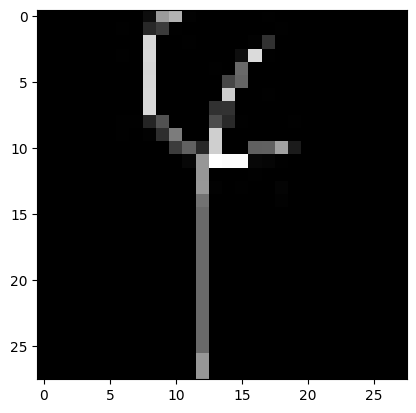

In [32]:
plt.imshow(x_test[35],cmap=plt.cm.binary)

In [99]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

In [136]:
model = load_model('function_recognition_model1.h5')

In [ ]:
#Hàm xử lý ký tự đặc biệt
(def handle_special_chars(predicted_chars):
    new_predicted_chars = []
    i = 0
    while i < len(predicted_chars):
        char = predicted_chars[i]
        # Xử lý phân số
        if char == '/':
            if i > 0 and i < len(predicted_chars) - 1:
                numerator = predicted_chars[i-1]
                denominator = predicted_chars[i+1]
                new_char = f"{numerator}/{denominator}"
                new_predicted_chars.pop()
                new_predicted_chars.pop()
                new_predicted_chars.append(new_char)
                i += 1
            else:
                new_predicted_chars.append(char)
        # Xử lý bình phương
        elif char == '^':
            if i > 0 and i < len(predicted_chars) - 1:
                base = predicted_chars[i-1]
                new_char = f"{base}^2"
                new_predicted_chars.pop()
                new_predicted_chars.append(new_char)
            else:
                new_predicted_chars.append(char)
        # Xử lý căn bậc hai
        elif char == '√':
            if i < len(predicted_chars) - 1:
                radicand = predicted_chars[i+1]
                new_char = f"√({radicand})"
                new_predicted_chars.pop()
                new_predicted_chars.append(new_char)
                i += 1
            else:
                new_predicted_chars.append(char)
        else:
            new_predicted_chars.append(char)
        i += 1
    return new_predicted_chars)

In [173]:

image_path = 'D:/DoAn1/Untitled.png'  # Thay 'path/to/your/image.png' bằng đường dẫn ảnh của bạn
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Làm mờ ảnh để giảm nhiễu và cải thiện việc xác định biên
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Xử lý ảnh để xác định biên (edge detection)
edges = cv2.Canny(blurred_image, 50, 150)

# Tìm các đường biên trong ảnh (dùng OpenCV 4.5.1 trở lên)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Tạo một bản sao của ảnh để vẽ đường biên
contour_image = np.copy(image)

# Tạo danh sách các hình ảnh con chứa từng ký tự riêng lẻ
character_images = []

# Tạo danh sách tọa độ x của các đường biên
x_coords = []

for contour in contours:
    # Xác định hình chữ nhật bao quanh biên
    x, y, w, h = cv2.boundingRect(contour)
    
    # Loại bỏ các contour nhỏ hoặc quá lớn
    if w < 5 or h < 5 or w > 100 or h > 100:
        continue

    # Trích xuất hình ảnh con chứa ký tự từ hình ảnh gốc
    character_image = gray_image[y:y+h, x:x+w]
    character_images.append(character_image)
    x_coords.append(x)  # Lưu tọa độ x của đường biên
    # Vẽ hình chữ nhật bao quanh ký tự trên bản sao ảnh
    cv2.rectangle(contour_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Sắp xếp lại danh sách character_images theo tọa độ x
sorted_character_images = [char_img for _, char_img in sorted(zip(x_coords, character_images))]

# Chuẩn bị dữ liệu cho mô hình nhận diện ký tự
predicted_characters = []

for char_img in sorted_character_images:
    char_img_resized = cv2.resize(char_img, (28, 28))
    char_img_resized = char_img_resized.astype('float32')
    char_img_resized /= 255.0
    char_img_resized = np.expand_dims(char_img_resized, axis=0)
    char_img_resized = np.expand_dims(char_img_resized, axis=-1)

    # Dự đoán ký tự
    prediction = model.predict(char_img_resized)
    predicted_class_idx = np.argmax(prediction)
    class_labels = ['(', ')', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'alpha', 'beta', 'cos', 'delta', '/', 'e',
                'h', 'i', 'in', 'log', 'p', 'phi', 'sin', 'sqrt', '*', 'v', 'x', 'y', 'z']
    predicted_class = class_labels[predicted_class_idx]
    predicted_characters.append(predicted_class)

# Kết hợp các ký tự dự đoán để thu được công thức toán học hoàn chỉnh
cv2.imshow('Original Image', image)
cv2.imshow('Contours', contour_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
math_expression = "".join(predicted_characters)
print("Công thức toán học:", math_expression)

1/1 [==============================] - 0s 19ms/step
Công thức toán học: 1+2=3


In [ ]:
# Giả định class_labels là danh sách các nhãn lớp tương ứng
class_labels = ['(', ')', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'alpha', 'beta', 'cos', 'delta', 'div', 'e',
            'h', 'i', 'in', 'log', 'p', 'phi', 'sin', 'sqrt', 'times', 'v', 'x', 'y', 'z']
